In [1]:

%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../src')
import data_setup as ds
import models
import engine as engine
import utils
import experiments 


import torch
import torch.nn as nn
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
import json


device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")
utils.set_seed(42)

d:\Matthijs\miniconda3\envs\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda


In [ ]:
# Dataset Info
data_path = "../data/processed/dataset_Fz_stft_2000"

print("=== Dataset Summary ===\n")
class_names = sorted([d for d in os.listdir(data_path) 
                      if os.path.isdir(os.path.join(data_path, d))])

total_images = 0
for label in class_names:
    label_path = os.path.join(data_path, label)
    num_images = len([f for f in os.listdir(label_path) 
                     if f.endswith(('.png', '.jpg', '.jpeg'))])
    print(f"{label}: {num_images} images")
    total_images += num_images

print(f"\nTotal: {total_images} images")
print(f"Classes: {class_names}")

=== Dataset Summary ===

initial: 2601 images
rapid: 2964 images
stable: 6708 images

Total: 12273 images
Classes: ['initial', 'rapid', 'stable']


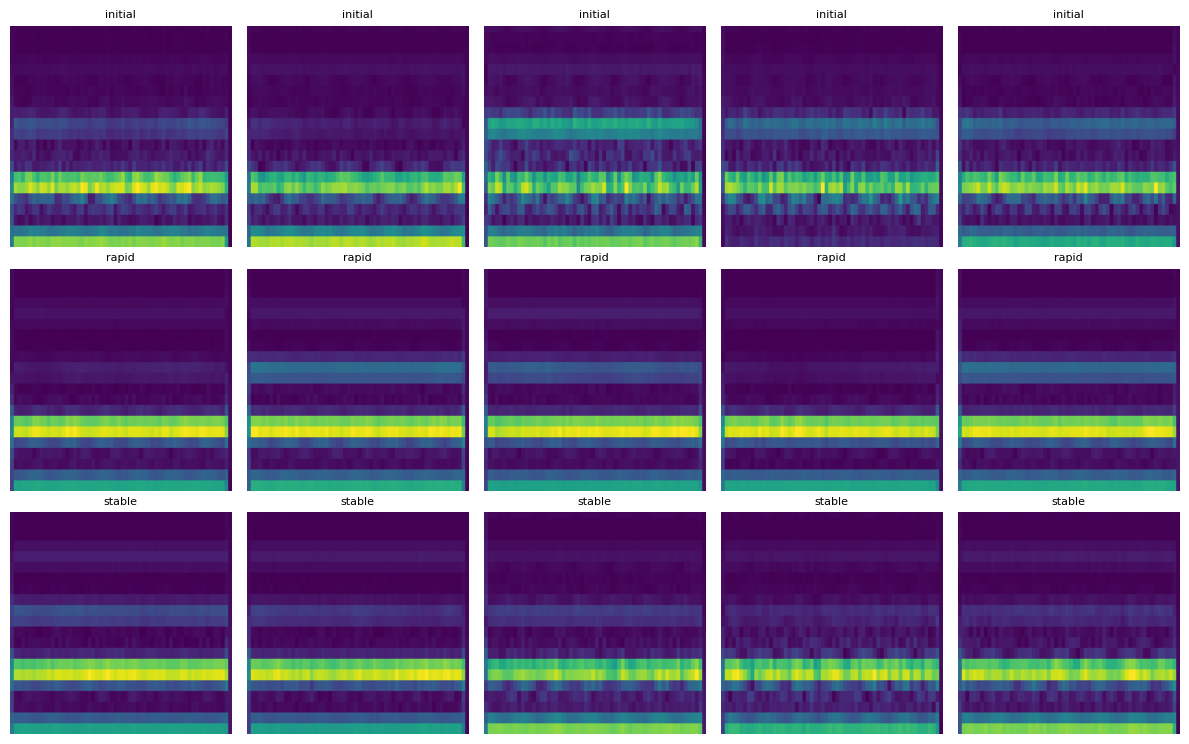

In [10]:

fig, axes = plt.subplots(len(class_names), 5, figsize=(12, len(class_names)*2.5))

for idx, cls in enumerate(class_names):
    cls_path = os.path.join(data_path, cls)
    all_files = os.listdir(cls_path)
    random_files = random.sample(all_files, min(5, len(all_files)))
    
    for j, filename in enumerate(random_files):
        img_path = os.path.join(cls_path, filename)
        img = Image.open(img_path)
        
        axes[idx, j].imshow(img)
        axes[idx, j].set_title(f"{cls}", fontsize=8)
        axes[idx, j].axis('off')

plt.tight_layout()
plt.show()

# TEST NEW

In [3]:
# Experiment configuration
EXPERIMENT_NAME = "test_vit"
DATA_PATH = "../data/processed/dataset_Fz_stft_2000"
N_SAMPLES = 100
BATCH_SIZE = 32
EPOCHS = 20
LEARNING_RATE = 0.001


transform = models.get_vit_transforms()
model = models.create_vit_model(num_classes=3, device=device)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
loss_fn = nn.CrossEntropyLoss()

In [ ]:

# from torchinfo import summary
# summary(
#     model=model,
#     input_size=(BATCH_SIZE, 3, 224, 224),
#     col_names=["input_size", "output_size", "num_params", "trainable"],
#     col_width=20,
#     row_settings=["var_names"]
# )

In [4]:
results = experiments.run_experiment(
    data_path=DATA_PATH,
    model=model,
    optimizer=optimizer,
    loss_fn=loss_fn,
    transform=transform,
    device=device,
    n_samples=N_SAMPLES,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS
)


initial: 100 train, 25 test
rapid: 100 train, 25 test
stable: 100 train, 25 test
Classes: ['initial', 'rapid', 'stable']


  5%|▌         | 1/20 [00:10<03:22, 10.68s/it]

Epoch: 1 | train_loss: 0.9903 | train_acc: 0.4906 | test_loss: 0.8995 | test_acc: 0.5208


 10%|█         | 2/20 [00:15<02:08,  7.16s/it]

Epoch: 2 | train_loss: 0.6801 | train_acc: 0.7458 | test_loss: 0.6017 | test_acc: 0.8551


 15%|█▌        | 3/20 [00:19<01:41,  5.98s/it]

Epoch: 3 | train_loss: 0.5490 | train_acc: 0.8177 | test_loss: 0.5568 | test_acc: 0.7860


 20%|██        | 4/20 [00:24<01:26,  5.42s/it]

Epoch: 4 | train_loss: 0.4807 | train_acc: 0.8448 | test_loss: 0.4639 | test_acc: 0.8769


 25%|██▌       | 5/20 [00:29<01:17,  5.14s/it]

Epoch: 5 | train_loss: 0.4333 | train_acc: 0.8604 | test_loss: 0.4646 | test_acc: 0.8267


 30%|███       | 6/20 [00:33<01:09,  4.98s/it]

Epoch: 6 | train_loss: 0.4053 | train_acc: 0.8406 | test_loss: 0.4018 | test_acc: 0.8769


 35%|███▌      | 7/20 [00:38<01:02,  4.84s/it]

Epoch: 7 | train_loss: 0.3778 | train_acc: 0.8823 | test_loss: 0.3928 | test_acc: 0.8674


 40%|████      | 8/20 [00:43<00:57,  4.78s/it]

Epoch: 8 | train_loss: 0.3673 | train_acc: 0.8719 | test_loss: 0.3670 | test_acc: 0.8977


 45%|████▌     | 9/20 [00:47<00:52,  4.75s/it]

Epoch: 9 | train_loss: 0.3484 | train_acc: 0.8948 | test_loss: 0.3515 | test_acc: 0.9072


 50%|█████     | 10/20 [00:52<00:47,  4.73s/it]

Epoch: 10 | train_loss: 0.3314 | train_acc: 0.9125 | test_loss: 0.3412 | test_acc: 0.8873


 55%|█████▌    | 11/20 [00:56<00:42,  4.67s/it]

Epoch: 11 | train_loss: 0.3347 | train_acc: 0.8927 | test_loss: 0.3275 | test_acc: 0.8873


 60%|██████    | 12/20 [01:01<00:37,  4.67s/it]

Epoch: 12 | train_loss: 0.3190 | train_acc: 0.8990 | test_loss: 0.3203 | test_acc: 0.9280


 65%|██████▌   | 13/20 [01:06<00:32,  4.66s/it]

Epoch: 13 | train_loss: 0.3268 | train_acc: 0.8854 | test_loss: 0.3071 | test_acc: 0.9176


 70%|███████   | 14/20 [01:10<00:27,  4.64s/it]

Epoch: 14 | train_loss: 0.3109 | train_acc: 0.8812 | test_loss: 0.3106 | test_acc: 0.9081


 75%|███████▌  | 15/20 [01:15<00:23,  4.63s/it]

Epoch: 15 | train_loss: 0.2952 | train_acc: 0.8979 | test_loss: 0.3004 | test_acc: 0.9081


 80%|████████  | 16/20 [01:19<00:18,  4.60s/it]

Epoch: 16 | train_loss: 0.2880 | train_acc: 0.9010 | test_loss: 0.2884 | test_acc: 0.9176


 85%|████████▌ | 17/20 [01:24<00:13,  4.58s/it]

Epoch: 17 | train_loss: 0.2853 | train_acc: 0.8896 | test_loss: 0.2829 | test_acc: 0.9384


 90%|█████████ | 18/20 [01:29<00:09,  4.60s/it]

Epoch: 18 | train_loss: 0.2742 | train_acc: 0.9062 | test_loss: 0.2927 | test_acc: 0.9186


 95%|█████████▌| 19/20 [01:33<00:04,  4.61s/it]

Epoch: 19 | train_loss: 0.2914 | train_acc: 0.8969 | test_loss: 0.2739 | test_acc: 0.9384


100%|██████████| 20/20 [01:38<00:00,  4.92s/it]

Epoch: 20 | train_loss: 0.2653 | train_acc: 0.8990 | test_loss: 0.2733 | test_acc: 0.9384

Training time: 98.33 seconds (1.64 minutes)


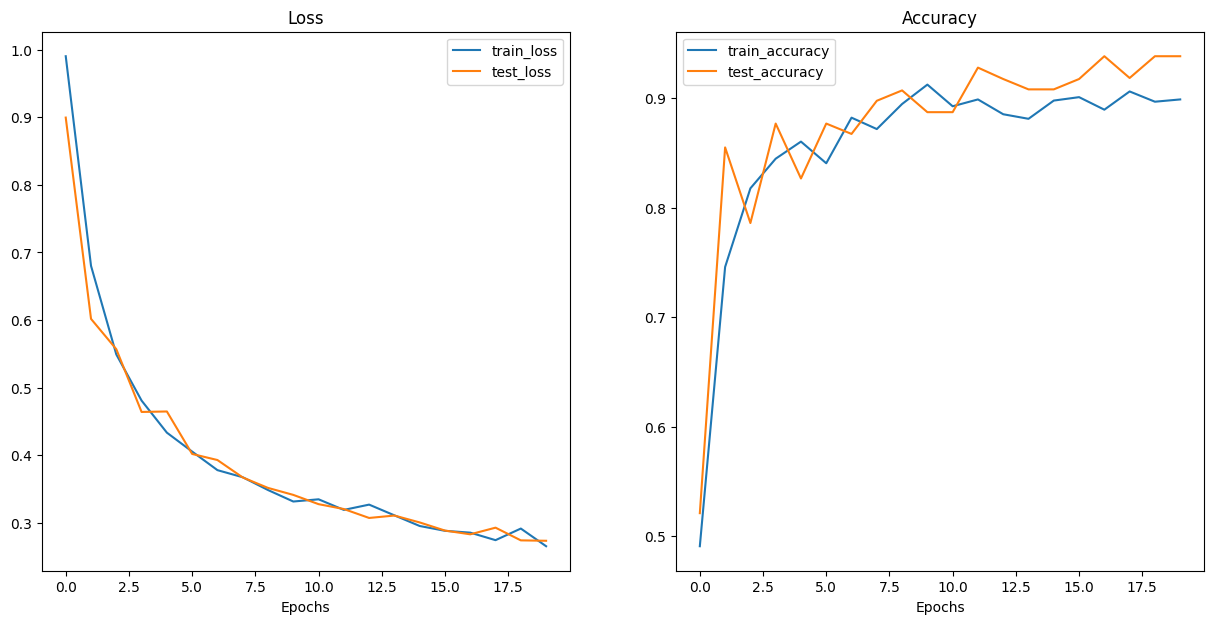

In [5]:
utils.plot_loss_curves(results)

In [6]:
save_path = f"../experiments/results/{EXPERIMENT_NAME}/model.pth"
utils.save_model(model, save_path)

Model saved to ../experiments/results/test_vit/model.pth
